Mean absolute error:  3.92
Mean squared error:  18.94
Root mean squared error:  4.35


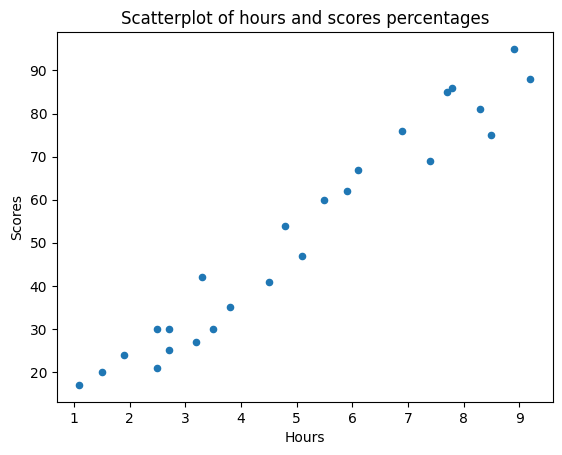

In [14]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

path_to_file = 'student_scores.csv'
df = pd.read_csv(path_to_file)

df.plot.scatter(x='Hours', y='Scores', title='Scatterplot of hours and scores percentages')

y = df['Scores'].values.reshape(-1, 1)
x = df['Hours'].values.reshape(-1, 1)

seed = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = seed)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae: .2f}')
print(f'Mean squared error: {mse: .2f}')
print(f'Root mean squared error: {rmse: .2f}')

In [33]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

path_to_file = 'original.csv'
df = pd.read_csv(path_to_file)

path_to_file2 = 'original.csv'
df2 = pd.read_csv(path_to_file2)

pressao1 = df['pressao'].values
pressao2 = df2['pressao'].values

mae = mean_absolute_error(pressao1, pressao2)
mse = mean_squared_error(pressao1, pressao2)

print(f'Mean absolute error: {mae}')
print(f'Mean squared error: {mse}')

Mean absolute error: 0.0
Mean squared error: 0.0


In [34]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

path_to_file = 'original.csv'
df = pd.read_csv(path_to_file)

path_to_file2 = 'muito_errada.csv'
df2 = pd.read_csv(path_to_file2)

pressao1 = df['pressao'].values
pressao2 = df2['pressao'].values

mae = mean_absolute_error(pressao1, pressao2)
mse = mean_squared_error(pressao1, pressao2)

print(f'Mean absolute error: {mae}')
print(f'Mean squared error: {mse}')

Mean absolute error: 108.33333333333333
Mean squared error: 12679.333333333334


In [35]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

path_to_file = 'original.csv'
df = pd.read_csv(path_to_file)

path_to_file2 = 'quase_correta.csv'
df2 = pd.read_csv(path_to_file2)

pressao1 = df['pressao'].values
pressao2 = df2['pressao'].values

mae = mean_absolute_error(pressao1, pressao2)
mse = mean_squared_error(pressao1, pressao2)

print(f'Mean absolute error: {mae}')
print(f'Mean squared error: {mse}')

Mean absolute error: 2.8333333333333335
Mean squared error: 10.833333333333334


In [65]:
import pandas as pd

path_to_file = 'original.csv'
df = pd.read_csv(path_to_file)

path_to_file2 = 'muito_errada.csv'
df2 = pd.read_csv(path_to_file2)

pressao1 = df['pressao'].values
pressao2 = df2['pressao'].values

soma = 0
for x in range(len(pressao1)):
    sub = pressao1[x]-pressao2[x]
    square = sub**2
    soma += square
    mse = soma/len(pressao1)
print(mse)

12679.333333333334


[[118.097443  ]
 [147.73581056]]
Mean squared error: 86.09265849492914


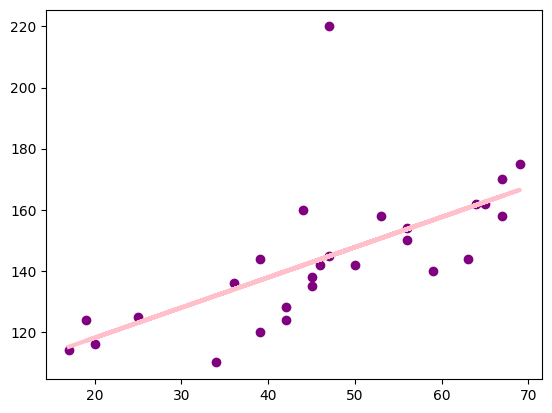

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

diretorio = 'modelo_regressao_linear.csv'
arquivo = pd.read_csv(diretorio)

y = arquivo['pressao'].values.reshape(-1, 1)
x = arquivo['idade'].values.reshape(-1, 1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.1, random_state = 42)

regressor = LinearRegression()
regressor.fit(x_treino, y_treino)
y_prev = regressor.predict(x_teste)  
arquivo_prevs = pd.DataFrame({'Atual': y_teste.squeeze(), 'Previsto': y_prev.squeeze()})
print(regressor.predict(np.array([[20],[50]])))


mse = mean_squared_error(y_teste, y_prev)

print(f'Mean squared error: {mse}')

y_prev_treino = regressor.predict(x_treino)

plt.scatter(x_treino, y_treino,  color='purple')
plt.plot(x_treino, y_prev_treino, color='pink', linewidth=3)
plt.show()

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

def optimize_OLS(X, y):
    frist_colum = np.ones(X.shape[0])
    X_1 = np.c_[frist_colum,X]
    before_inv = X_1.T @ X_1
    noise = np.eye(before_inv.shape[0])*0.0000001
    pesos = (((np.linalg.inv(before_inv+ noise)) @ X_1.T) @ y)
    return pesos.T

diretorio = 'modelo_regressao_linear.csv'
arquivo = pd.read_csv(diretorio) 

X = arquivo['idade'].values.reshape(-1, 1) 
y = arquivo['pressao'].values.reshape(-1, 1)

x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.1, random_state = 42)

pesos = optimize_OLS(x_treino,y_treino)        

array_inicial = np.array(x_teste)
coluna_a_ser_adicionada = np.array([1, 1, 1])
novo_x_teste = np.column_stack((coluna_a_ser_adicionada, array_inicial))
transposta_x_teste = novo_x_teste.T

def mult(pesos,transposta_x_teste):
    c = []
    for x in range(len(pesos)):
        j = []
        for y in range(len(transposta_x_teste[x])):
            soma = 0
            for w in range(len(transposta_x_teste)):
                soma += pesos[x][w]*transposta_x_teste[w][y]
            j.append(soma)
        c.append(j)
    return c
y_prev = mult(pesos,transposta_x_teste)
transposta_y_teste = y_teste.T

def mse(transposta_y_teste,y_prev):
    for x in range(len(transposta_y_teste)):
        sub = transposta_y_teste[x]-y_prev[x]
        square = sub**2
        soma = 0
        for y in range(len(square)):
            soma += square[y]
            mse = soma/len(square)
        return mse
print(f"mean squared error: {mse(transposta_y_teste,y_prev)}")

mean squared error: 86.09266077703626
